# Цифровая обработка сигналов - 9

| **Title**         | Digital signal processing |
| --- | --- |
| **Authors**       | Vladimir Fadeev, Zlata Fadeeva       |
| **Contact**       | <hidden email>            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Непараметрические методы спектрального анализа

Нередко перед исследователями встаёт вопрос анализа характеристик сигнала, процесса или явления.

Одним из инструментов по определению таких характеристик является **спектральный анализ**.

Методы спектрального анализа можно разделить на две большие группы:

1. параметричесие методы;
2. непараметрические методы.

Для применения параметрических методов требуется априорное знание о параметрах исследуемого объекта, в случае непараметрических методов - не требуется. Именно о последних и пойдет речь в данном семинаре.

> **Допущение**: Будут рассматриваться стационарные в широком смысле (WSS - wide-sense stationary) случайные процессы.

Спектр мощности для случайного в широком смысле процесса $x(n)$ (где $n$ - номер временного отсчета) представляет из себя ничто иное, как преобразование Фурье автокорреляционной функции данного процесса [1, 393]:

$$ P_x(e^{j\omega}) = \sum_{-\infty}^{\infty} r_x(k)e^{jk\omega} \qquad(1)$$

где $\omega$ - это циклическая частота, а $k$ - номер частотного отсчета (индекс частоты). 


На конечном интервале автокорреляционная функция примет вид:

$$ \hat{r}(k) = \frac{1}{N}\sum_{n=0}^{N-1}x(n+k)x^*(n) \qquad (2)$$

где $N$ - длина последовательности временных отсчетов.

## Метод периодограмм

Одним из самых простых и популярных представителей группы непараметрических методов является [метод периодограмм](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B8%D0%BE%D0%B4%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0), предложенный Артуром Шустером ещё в конце XIX века. Рассмотрим математическое описание данного метода.

Для начала, в качестве ограничения зададим условие, непозволяющее нашему сигналу $x(n)$ выходить за пределы интервала:

$$ x_N(n) =
 \begin{cases}
   x(n), &0 \leq n \leq N \\
   0, &\text{otherwise}
 \end{cases}
 \qquad (3)$$

Следовательно, $x_N(n)$ - это результат перемножения сигнала с оконной функцией прямоугольного вида:
$$ x_N(n) = \omega_R(n)x(n) \qquad(4)$$

Приняв во внимание формулу (3), переопределим формулу (2) через свертку:
$$ \hat{r}(k) = \frac{1}{N}x_N(k)*x_N(-k) \qquad(5)$$

Тогда преобразование Фурье автокорреляционной функции даст следующий результат:
$$ \hat{P}_{Per}(e^{j\omega}) = \frac{1}{N}X_N(e^{j\omega})X_N^*(e^{j\omega}) = \frac{1}{N} \left| X_N(e^{j\omega}) \right|^2 \qquad(6)$$

Следовательно, периодограмма пропорциональна квадрату амплитуды преобразованию Фурье дискретного времени (DTFT - discrete-time Fourier transform), а значит вполне может быть вычислена через алгоритм БПФ (FFT) на этапе программной реализации.

> В python метод периодограмм реализован в рамках библиотеки **scipy.signals** в виде метода [**periodogram**](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html).  

Возвратимся к формуле (4). Было отмечено, что периодограмма пропорциональна результату перемножения сигнала с оконной функцией $\omega(n)$, при условии, что данная функцию является прямоугольной. Однако, нужно отметить, что оконная функция может быть и других форм. 

> В методе **periodogram** библиотеки **scipy** форма окна определяется параметром *window* (полный список доступных форм можно посмотреть по [данной ссылке](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window)).

Периодограмма с использованием непрямоугольного окна часто называется **модифицированной**:

$$ \hat{P}_{M}(e^{j\omega}) = \frac{1}{NU}\left| \sum_{n=-\infty}^{\infty} x(n)\omega(n)e^{-jn\omega}\right|^2 \qquad(7)$$

где $N$ - это длина окна, а $U$ - это константа [1, с. 410]: $$ U= \frac{1}{N}\sum_{n=0}^{N-1}|\omega(n)|^2 \qquad (8)$$ 

которая показывает асимптотическую несмещенность (*unbiased*) модифицированной периодограммы. 

## Методы Бартлетта и Уэлча 

Рассмотрим более последовательные оценки мощностных спектров. Предпосылкой является наблюдение, что, при увеличении длины последовательности $N$ до бесконечности, математическое ожидание периодограммы стремится к $P_x(e^{j\omega})$:

$$ \lim_{N \to \infty} E\{ \hat{P}_{Per}(e^{j\omega})\} = P_x(e^{j\omega}) \qquad (9)$$

Соответственно, если мы найдём последовательную оценку мат. ожидания $E\{ \hat{P}_{Per}(e^{j\omega})\}$, то оценка $P_x(e^{j\omega})$ так же будет последовательной. Для этого можно применить классическое усреднение по некоторой выбоке реализаций.

Конечно, в реальных системах более реалистичным является случай, когда вместо сбора достаточного количества реализаций процесса, мы исследуем сигнал достаточной длины, который разбивается на последовательности (*sequences*), а уже те, в свою очередь, используются для усреднения (рис.1).

![](https://habrastorage.org/webt/r2/ll/ce/r2llce_bbh-rggup6dvk-losjxu.png)

*Рис. 1. Разбиение $x(n)$ на неперекрывающиеся последовательности [1, c. 413].*

В литературе такой подход называется методом **Бартлетта** [2, c. 332]:

$$ \hat{P}_B(e^{j\omega}) = \frac{1}{N} \sum_{i=0}^{K-1}\left| \sum_{n=0}^{L-1} x(n+iL)e^{-jn\omega} \right|^2 \qquad (10)$$

где $K$ - это количество неперекрывающихся (*non-overlapping*) последовательностей длинной $L$ каждая, а $N=KL$. Иначе говоря, перед нами формула усреднения периодограмм.



Однако, и это ещё не всё. В 1967 году Ф.Д. Уэлч предлагает метод, который позже будет носить его же имя \[2, c.333\]\[3\]. Подразумеваются следующие отличия от метода Бартлетта:

1) разбиение сигнала в том числе на **пересекающиеся** (*overlapping*)  последовательности;

2) применение не только прямоугольных оконных функций (**модифицированных** периодограмм).

> В python метод Уэлча реализован в рамках библиотеки **scipy.signals** в виде метода [**welch**](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html).

Применение непрямоугольных окон позволяет достичь больших степеней свободы в вопросах перекрытия (overlapping) \[4\]. При этом, используя перекрывающиеся последовательности, мы повышаем общее количество фрагметов сигнала. Как следствие, периодограмма Уэлча будет менее осциллирующей (изрезанной), чем периодограмма Бартлетта \[2, c.333\].

### Взаимосвязь между программными реализациями методов

Можно отметить следующую тенденции: метод Уэлча является общим случаем для методов Бартлетта и модифицированной периодограммы, а значит и для самого метода периодограмм. Именно это наблюдение легло в основу архитектуры методов в рамках реализации их на Python в рамках библиотеки scipy. 

## Моделирование

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

В качестве примера рассмотрим  гармонический сигнал следующего вида:

In [2]:
w_1 = 40 # frequency of the 1st component of the signal (Hz)
w_2 = 60 # frequency of the 2nd component of the signal (Hz)

a = 0.5 # magnitude of the 1st component of the signal
b = 1.0 # magnitude of the 2nd component of the signal

Зададим временной интервал:

In [3]:
Nsub = 10 # number of subsequences

t = np.array([i for i in range(1,301*Nsub)])/1000 # time samples (s)
fs = 1 / (t[1]-t[0]) # sampling frequency (Hz)

Nfft = int(3e3)

Моделируем сигнал:

In [4]:
x = a*np.cos(2*np.pi*w_1*t) + b*np.sin(2*np.pi*w_2*t) # considered signal
f = fs*np.array([i for i in range(int(len(x)))]) / len(x) # frequencies

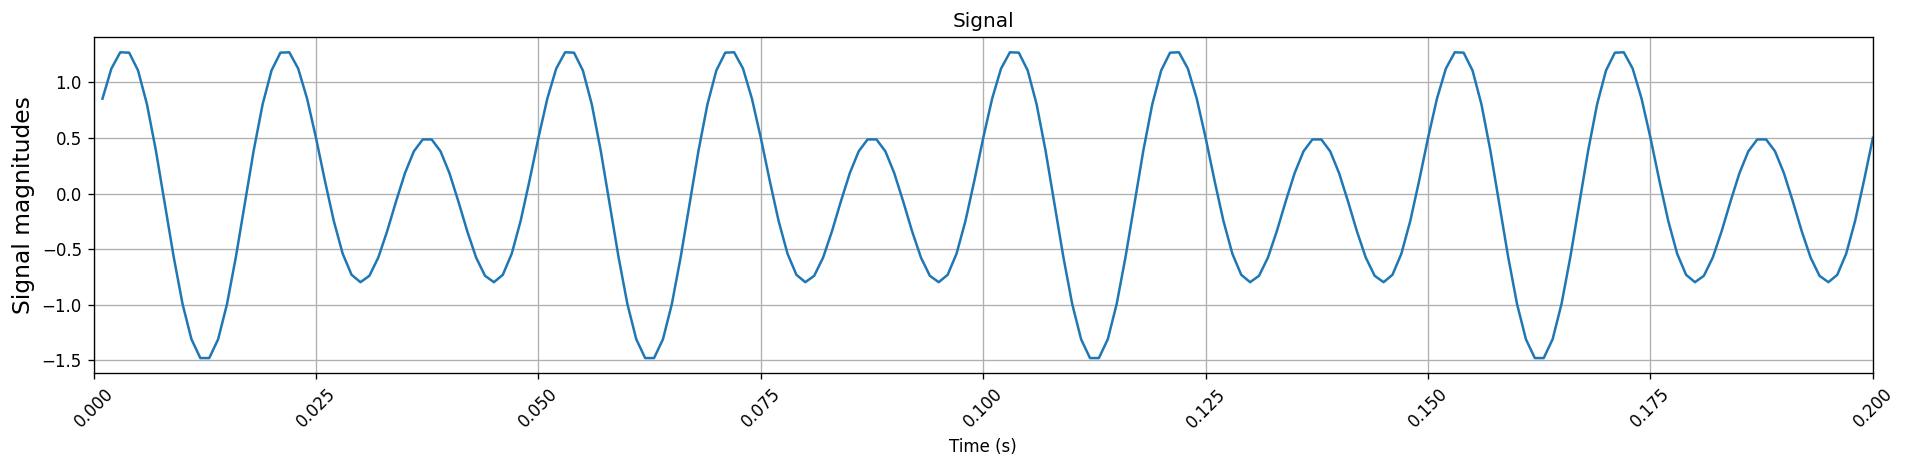

In [5]:
# Plot results
plt.subplots(1, 1, figsize=(16, 4), dpi=120)
plt.plot(t[:200], x[:200])
plt.ylabel('Signal magnitudes', fontsize=14)
plt.xlabel('Time (s)')
plt.title('Signal')
plt.xlim([0, 0.2])
plt.grid(True)
plt.tick_params(axis ='x', rotation = 45)
plt.tight_layout()

Построим частотный спектр амплитуд ДПФ:

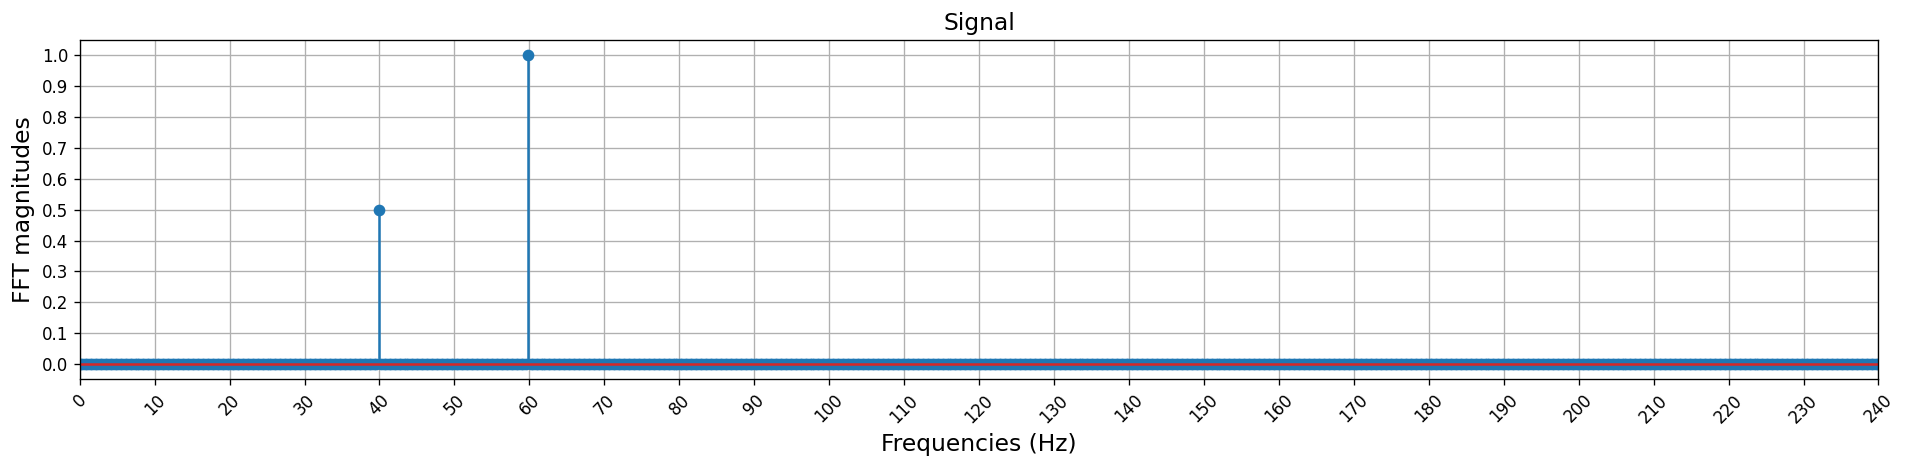

In [6]:
FFT = np.fft.fft(x, n=Nfft) # Fast Fourier Transform 
amps = np.abs(FFT) / (len(FFT) / 2) # magnitudes of FFT

l = int(len(f)/4)

plt.subplots(1, 1, figsize=(16, 4), dpi=120)
plt.stem(f[:l], amps[:l], use_line_collection=True)
plt.ylabel('FFT magnitudes', fontsize=14)
plt.xlabel('Frequencies (Hz)', fontsize=14)
plt.title('Signal', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(0, f[l], 10)) 
plt.yticks(np.arange(0, max(amps)+0.1, .1))
plt.tick_params(axis ='x', rotation = 45)
plt.xlim([0, 240])
plt.tight_layout()

Моделируем аддитивный шум:

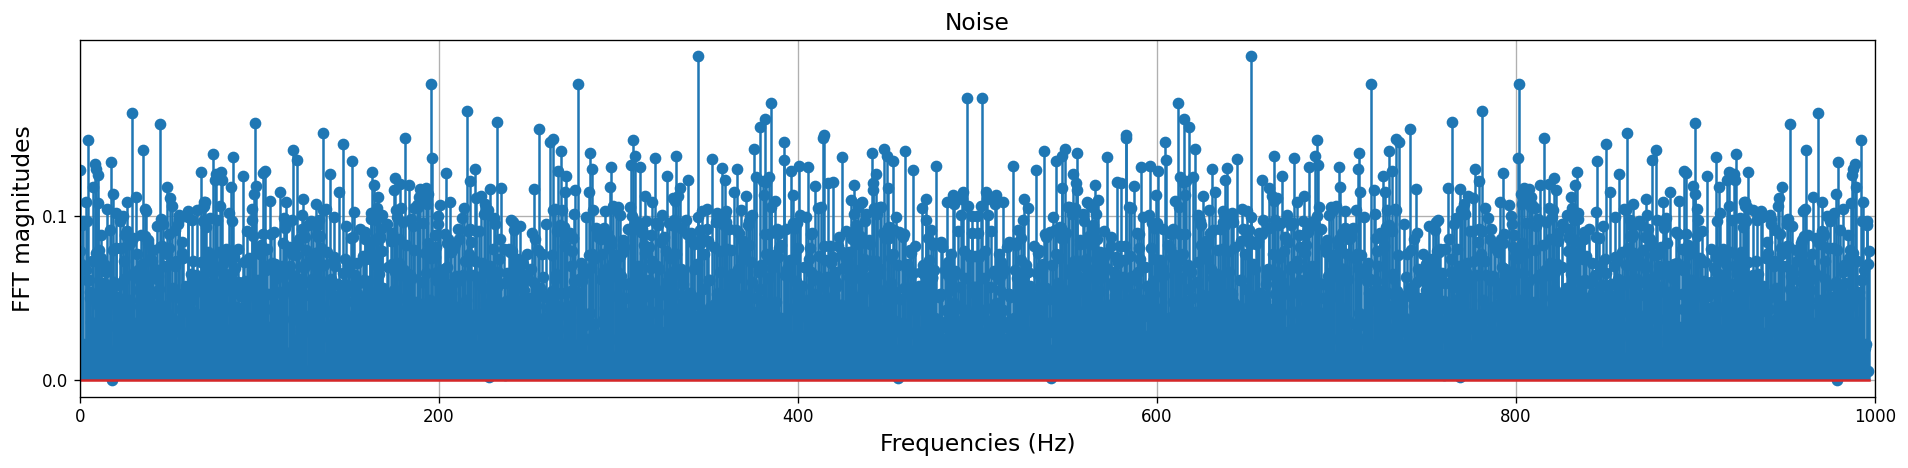

In [7]:
np.random.seed(42)
n = 2*np.random.randn(len(t)) # white Gaussian noise
FFT = np.fft.fft(n, n=Nfft)
amps = np.abs(FFT) / (len(FFT) / 2)

plt.subplots(1, 1, figsize=(16, 4), dpi=120)
plt.stem(f[:len(amps)], amps, use_line_collection=True)
plt.ylabel('FFT magnitudes', fontsize=14)
plt.xlabel('Frequencies (Hz)', fontsize=14)
plt.title('Noise', fontsize=14)
plt.yticks(np.arange(0, max(amps), .1))
plt.xlim([0, 1000])
plt.grid(True)
plt.tight_layout()

Добавляем шум к исходному сигналу:

In [8]:
y = x + n # signal + noise

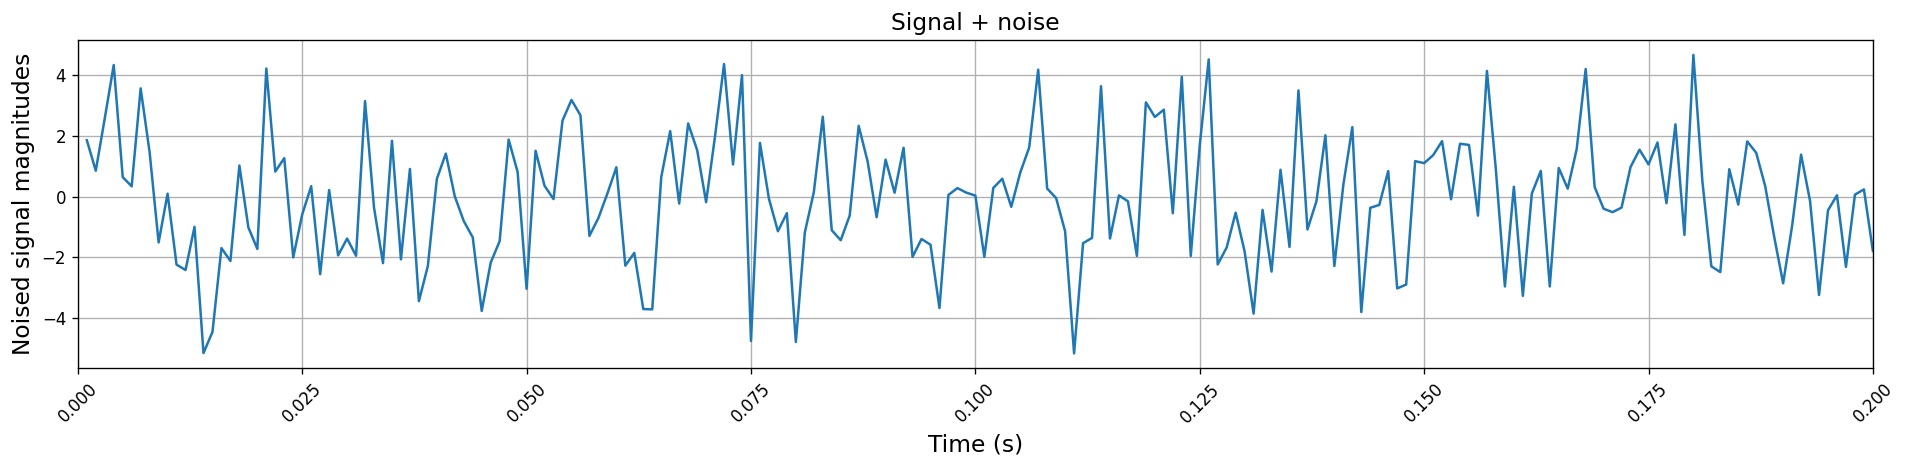

In [9]:
plt.subplots(1, 1, figsize=(16, 4), dpi=120)
plt.plot(t[:200], y[:200])
plt.ylabel('Noised signal magnitudes', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.title('Signal + noise', fontsize=14)
plt.xlim([0, 0.2])
plt.tick_params(axis ='x', rotation = 45)
plt.grid(True)
plt.tight_layout()

Попробуем проанализировать данный сигнал с помощью методов периодограмм и модифицированных периодограмм.

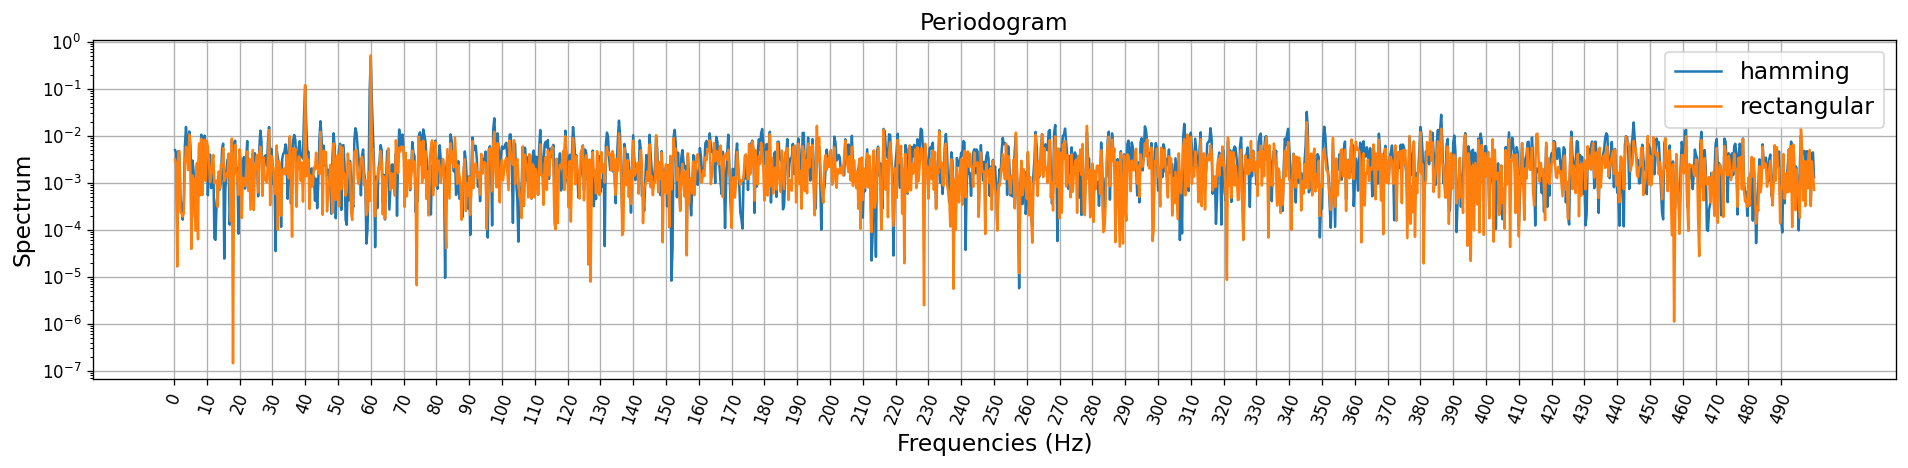

In [10]:
windows = ['hamming', None]
plt.subplots(1, 1, figsize=(16, 4), dpi=120)

for window in windows:
    if window == None:
        label = 'rectangular'
    else:
        label = window
    f, Pxx_den = signal.periodogram(y, fs=fs, scaling='spectrum', nfft=Nfft, window=window)
    plt.semilogy(f[1:], Pxx_den[1:], label=label)

plt.ylabel('Spectrum', fontsize=14)
plt.xlabel('Frequencies (Hz)', fontsize=14)
plt.title('Periodogram', fontsize=14)
plt.xticks(np.arange(0, max(f), 10)) 
plt.tick_params(axis ='x', rotation = 70)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()

Две составляющие полезного сигнала, конечно, различимы, но при больших шумовых амплитудах методы могут и не справится.

Попробуем применить метод Бартлетта для того же сигнала:


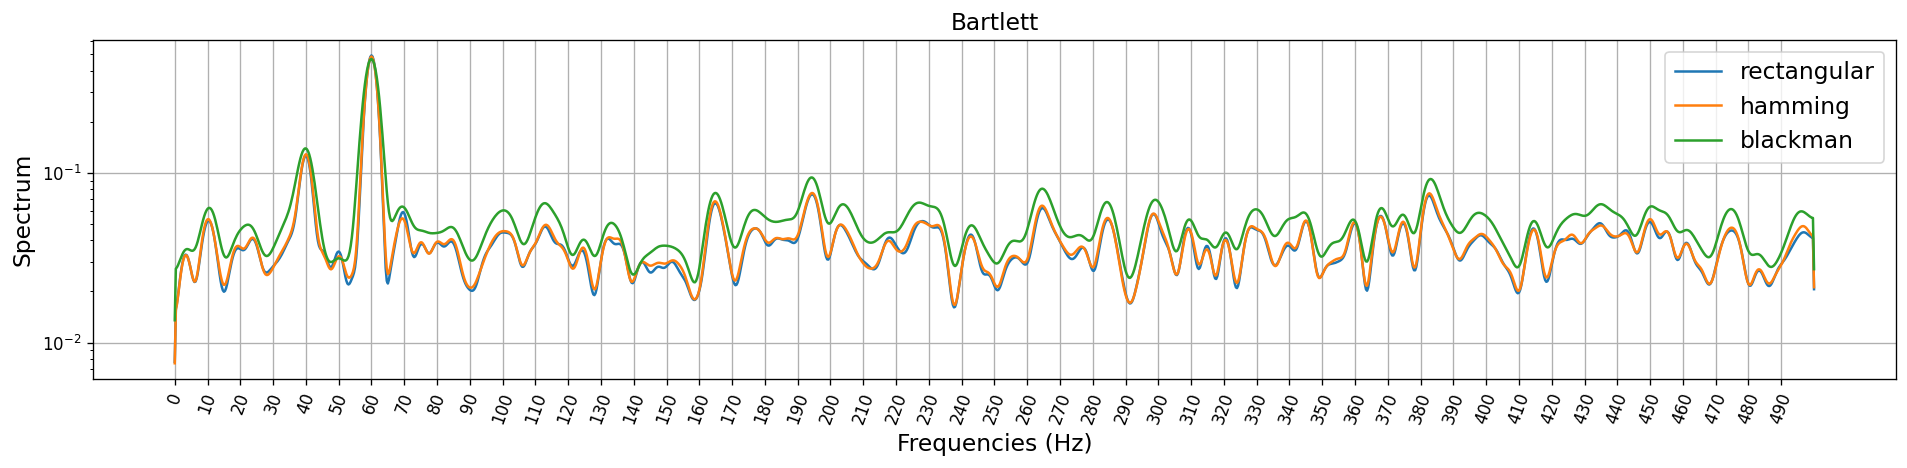

In [11]:
windows = ['bartlett','hamming','blackman']
plt.subplots(1, 1, figsize=(16, 4), dpi=120)

for window in windows:
    if window == 'bartlett':
        label = 'rectangular'
    else:
        label = window
    f, Pxx_den = signal.welch(y, fs=fs, nperseg = len(x)/Nsub, noverlap=0, scaling='spectrum', nfft=Nfft, window=window)
    plt.semilogy(f, Pxx_den, label=label)

plt.legend()
plt.ylabel('Spectrum', fontsize=14)
plt.xlabel('Frequencies (Hz)', fontsize=14)
plt.title('Bartlett', fontsize=14)
plt.xticks(np.arange(0, max(f), 10)) 
plt.tick_params(axis ='x', rotation = 70)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()

Отмечаем лучшую различимость составляющих полезного сигнала в случае разбиения на последовательности.

## Литература

1. Hayes M. H. Statistical digital signal processing and modeling. – John Wiley & Sons, 2009.
2. Солонина А. И. Цифровая обработка сигналов. Моделирование в MATLAB. – БХВ-Петербург, 2013.
3. "Digital Signal Processing: The Welch Method" by Prof. Dr.-Ing. Sascha Spors. URL: https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/spectral_estimation_random_signals/welch_method.html
4. Solomon, Jr, O M. PSD computations using Welch's method. [Power Spectral Density (PSD)]. United States: N. p., 1991. Web. doi:10.2172/5688766. - p.38.